## 1. Importações

Importando as dependências necessárias:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

sns.set_theme()

## 2. Conhecendo a base

Vamos importar a base **Iris** com a biblioteca **sklearn**:

In [3]:
from sklearn.datasets import load_iris

Vamos carregar a base usando a função **load_iris()**:

In [4]:
iris = load_iris()

Com a função **dir**, podemos ver o conteúdo do objeto **iris**:

In [5]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


- **data**: É a matriz de entrada (X). Tem as características (comprimento da pétala, largura, etc). 
- **target**: É a saída (y). É a lista com 0, 1, 2 dizendo que flor é qual.
- **feature_names**: São os nomes das colunas: ['sepal length', 'sepal width', ...].
- **target_names**: É a tradução do target: ['setosa', 'versicolor', 'virginica'].
- **DESCR**: É a descrição da história do dataset (quem coletou, em que ano, etc).

Os rótulos já são numéricos. Isso facilita a computação.

In [6]:
print(np.unique(iris.target))

[0 1 2]


Os nomes dos rótulos podem ser encontrados no vetor **target_names**.

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Podemos ver quais são os nomes (string) da classe 0, da classe 1 e da classe 2:

In [8]:
print(iris.target_names[0]) 
print(iris.target_names[1])
print(iris.target_names[2])

setosa
versicolor
virginica


Podemos ver as classes de alguns exemplos:

In [9]:
indices = [0, 15, 36, 51, 89, 101, 115, 149]

classes_num = iris.target[indices]
print(classes_num)

[0 0 0 1 1 2 2 2]


Podemos ver quais são as classes por escrito do teste:

In [10]:
print(iris.target_names[classes_num])

['setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica']


A descrição da base de dados está no atributo **.DESCR**:

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Vamos visualizar o conteúdo do atributo feature_names:

In [12]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Também podemos visualizar o que há em **data**:

In [13]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Nessa matriz gigante, cada linha é uma flor e as colunas são as medidas. 

Vamos verificar os valores de **média** e **desvio padrão** dos atributos da base.  

Quando usamos **axis=0**, ele percorre as linhas de cima para baixo e faz o cálculo para cada coluna.  
Ou seja, aqui, para cada atributo, obtemos a média (por exemplo) de todas as flores.

In [14]:
print(np.mean(iris.data, axis=0).round(3))

[5.843 3.057 3.758 1.199]


In [15]:
print(np.std(iris.data, axis=0).round(3))

[0.825 0.434 1.759 0.76 ]


## 3. Transformação

Vamos transformar os dados em um **dataframe**, pois, assim, é melhor para visualizar e manipular resultados em comparação com o NumPy.

In [16]:
# Cria um data frame contendo os atributos de entrada
iris_df = pd.DataFrame(data=iris.data,             # Atributos de entrada
                       columns=iris.feature_names, # Nomes das colunas
                      )

# Acrescenta as classes
iris_df['species'] = iris.target_names[iris.target]

# Mostra o resultado
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


O **dataframe** possui um método chamado **describe** que mostra uma descrição estatística de todas as colunas que possuem valor numérico.

In [17]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A descrição contém o seguinte, linha a linha:

- **count** é o número de valores numéricos. Aqui, será 150 para todas as colunas porque o **dataframe** está totalmente preenchido por valores numéricos. Se houvesse valores ausentes, algumas colunas teriam menos que 150 valores numéricos
- **mean** é a média de cada coluna (atributo)
- **std** é o desvio padrão de cada coluna
- **min** é o menor valor de cada coluna
- **25%** é o primeiro quartil
- **50%** é a mediana
- **75%** é o terceiro quartil
- **max** é o maior valor de cada coluna

Podemos visualizar essas estatística para cada classe.  
Primeiro, precisamos **agrupar** as linhas do dataframe por **espécie**.

O método **groupby** faz isso - ele retorna um objeto que representa um agrupamento.

Se agruparmos o dataframe anterior por espécie e, depois, gerarmos uma descrição estatística, o resultado será um dataframe que contém 3 linhas (uma para cada espécie) e 4×8 colunas (4 grupos de 8 descritores estatísticos):

In [18]:
iris_df.groupby('species').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Podemos transpô-lo para melhor visualização:

In [19]:
iris_df.groupby('species').describe().T

species                     setosa  versicolor  virginica
sepal length (cm) count  50.000000   50.000000  50.000000
                  mean    5.006000    5.936000   6.588000
                  std     0.352490    0.516171   0.635880
                  min     4.300000    4.900000   4.900000
                  25%     4.800000    5.600000   6.225000
                  50%     5.000000    5.900000   6.500000
                  75%     5.200000    6.300000   6.900000
                  max     5.800000    7.000000   7.900000
sepal width (cm)  count  50.000000   50.000000  50.000000
                  mean    3.428000    2.770000   2.974000
                  std     0.379064    0.313798   0.322497
                  min     2.300000    2.000000   2.200000
                  25%     3.200000    2.525000   2.800000
                  50%     3.400000    2.800000   3.000000
                  75%     3.675000    3.000000   3.175000
                  max     4.400000    3.400000   3.800000
petal length (cm) count  50.000000   50.000000  50.000000
                  mean    1.462000    4.260000   5.552000
                  std     0.173664    0.469911   0.551895
                  min     1.000000    3.000000   4.500000
                  25%     1.400000    4.000000   5.100000
                  50%     1.500000    4.350000   5.550000
                  75%     1.575000    4.600000   5.875000
                  max     1.900000    5.100000   6.900000
petal width (cm)  count  50.000000   50.000000  50.000000
                  mean    0.246000    1.326000   2.026000
                  std     0.105386    0.197753   0.274650
                  min     0.100000    1.000000   1.400000
                  25%     0.200000    1.200000   1.800000
                  50%     0.200000    1.300000   2.000000
                  75%     0.300000    1.500000   2.300000
                  max     0.600000    1.800000   2.500000

## 4. Visualização

Vamos gerar um **pairplot** da base **Iris**.

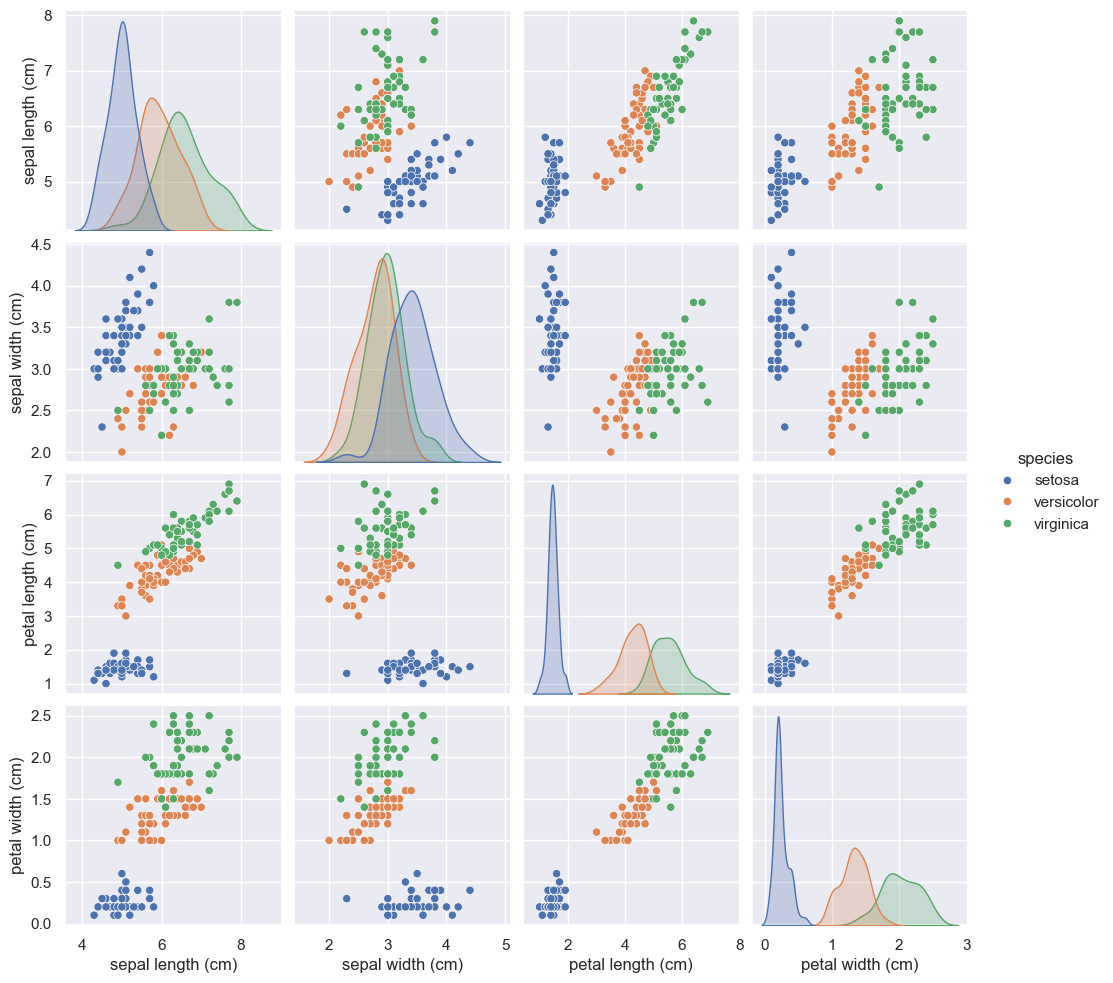

In [20]:
sns.pairplot(iris_df, hue='species');

Um **pairplot** é uma coleção de gráficos de espalhamento dos exemplos de uma base.  
Ele cruza todas as medidas umas contra as outras para achar padrões. 

Na **diagonal** do **pairplot**, temos **histogramas** dos atributos.
A altura do histograma está relacionada à quantidade de exemplos de determinada classe.  

No histograma do canto inferior direito, existe uma clara separação entre a curva azul e as demais, com um pico bem distinto em torno do valor 0,2.  
Podemos dizer que a maior largura de pétala dentre todas as flores Setosa (azul) é menor que todas as larguras de pétala de todas as outras. 

In [21]:
print(iris_df.loc[iris_df['species'] == 'setosa', 'petal width (cm)'].max())

0.6


In [22]:
print(iris_df.loc[iris_df['species'] == 'versicolor', 'petal width (cm)'].min())
print(iris_df.loc[iris_df['species'] == 'virginica', 'petal width (cm)'].min())

1.0
1.4


Pelos testes, confirmamos o que vimos no histograma.   
Isso significa que, usando um único atributo, seria possível separar (classificar) corretamente todos os exemplos da classe Setosa.  
Ainda seria necessário separar Versicolor de Virginica, mas já temos um bom insight acerca da nossa  base.

## 5. Pré-processamento

Vamos dividir a base de dados em duas partes: um conjunto de treino e um de teste.

O particionamento pode ser feito pela função **train_test_split**.  
Nós vamos usar os seguintes parâmetros:

- 1º parâmetro (não nomeado): uma matriz contendo os atributos de entrada.
- 2º parâmetro (não nomeado): um vetor contendo o atributo de saída (classe).
- **stratify**: um vetor contendo informações das classes para **estratificar** o particionamento. Isso garante que os dois conjuntos resultantes terão aproximadamente a mesma distribuição de exemplos por classe que o conjunto original.
- **test_size**: tamanho do conjunto de teste; vamos especificar 30%.
-  **random_state**: uma semente para geração de números pseudoaleatórios, garantindo que o resultado obtido será o mesmo sempre que o comando for executado.

Como saída, teremos dois subconjuntos: o par **(X_train, y_train)** contém os dados de treinamento (entrada, saída) e o par **(X_test, y_test)** contém os dados de teste.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    stratify=iris.target,
                                                    test_size=0.3,
                                                    random_state=1337)

Vendo como ficaram os conjuntos:

In [25]:
print("Exemplos no subconjunto de treino:", len(X_train))
print("Exemplos no subconjunto de Teste:", len(X_test))

Exemplos no subconjunto de treino: 105
Exemplos no subconjunto de Teste: 45


Vendo quantos exemplos de cada classe temos no conjunto de treinamento:

In [26]:
print(np.histogram(y_train, bins=3)[0])

[35 35 35]


Fazendo o mesmo para o conjunto de teste:

In [27]:
print(np.histogram(y_test, bins=3)[0])

[15 15 15]


## 5. Criando modelos

Para treinar e aplicar modelos, o Scikit-Learn adota um protocolo de duas partes:

- **fit**: realiza o ajuste do modelo aos dados, encontrando os parâmetros da melhor hipótese à amostra de treinamento.
- **predict**: aplica o modelo a um conjunto de dados, realizando a previsão da classe.

Para o ajuste, o modelo precisa de acesso às características e às classes.  
Para previsões, o modelo precisa apenas das características dos exemplos a serem previstos, e retorna os valores previstos.

## 5.1. Decision Tree

Vamos instanciar um objeto da classe **DecisionTreeClassifier**.  
Caso nenhum argumento seja passado para o construtor, será utilizado o critério de impureza de Gini para encontrar os atributos.  
Para usar ganho de informação e entropia, usamos **criterion='entropy'**.

Em seguida, usando o método **fit**, fazemos o treinamento do modelo para a amostra de treino.

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=42);

In [29]:
clf_dt.fit(X_train, y_train);

Vamos usar o método DecisionTreeClassifier.plot_tree() para desenhar uma figura que representa as decisões que foram aprendidas pelo modelo de árvore.  
O método plt.figure() é usado primeiramente para especificarmos as dimensões da figura que será plotada.

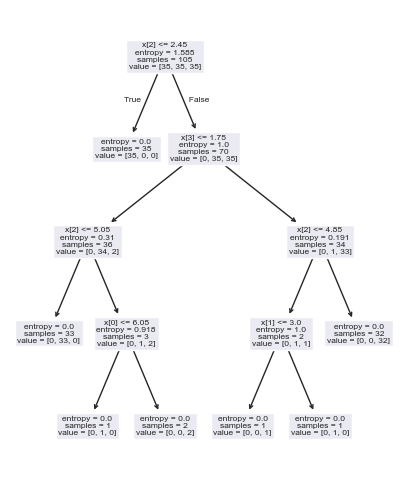

In [30]:
plt.figure(figsize=(5, 6));
sklearn.tree.plot_tree(clf_dt);

Agora vamos verificar como esse modelo se comporta quando é aplicado aos exemplos do conjunto de teste.  
Isso nos permite simular o desempenho do modelo "no mundo real".

Fazendo a previsão com o modelo nos dados de teste:

In [31]:
ypred_dt = clf_dt.predict(X_test)

Verificando quais foram as classes preditas:

In [32]:
ypred_dt

array([0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1,
       0])

Os resultados são todos numéricos, mas podemos verificar quais flores são essas:

In [33]:
nomes_preditos = iris.target_names[ypred_dt]

print(nomes_preditos)

['setosa' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa']


Podemos fazer um **dataframe** comparando quais casos foram corretamente classificados e quais foram incorretamente classificados:

In [34]:
# 1. Criamos a tabela vazia
tabela_dt = pd.DataFrame()

# 2. Preenchemos convertendo os números (y_test) para nomes
tabela_dt['Classe verdadeira'] = iris.target_names[y_test]

# 3. Preenchemos convertendo os números (ypred) para nomes
tabela_dt['Classe predita'] = iris.target_names[ypred_dt]

# 4. Mostramos apenas onde o modelo errou (Verdadeiro != Predito)
erros_dt = tabela_dt[tabela_dt['Classe verdadeira'] != tabela_dt['Classe predita']]

erros_dt

,Classe verdadeira,Classe predita
19,virginica,versicolor
30,virginica,versicolor


As métricas são funções numéricas utilizadas para medir a qualidade dos modelos de acordo com diferentes critérios.

A acurácia, especificamente, mede quantos exemplos foram corretamente classificados pelo modelo.  
É uma métrica típica de problemas de **classificação** e pode ser calculada com a seguinte equação:

$$\text{Acc}_X(y) = \frac{1}{|X|}\sum_{x \in X} \mathsf{I}\left(\hat{f}(x) = {\large\xi}(x)\right)$$

Sendo que

- $X$ é a amostra na qual estamos calculando a acurácia
- $I(\cdot)$ é a função indicadora; ela vale $1$ se a expressão for verdadeira e $0$ caso contrário
- $\hat{f}(x)$ é a saída do modelo para o exemplo $x$
- ${\large\xi}(x)$ é o rótulo verdadeiro (saída da função-conceito)

O resultado será um valor no intervalo $[0,1]$.  
Quanto maior a acurácia, melhor o desempenho do modelo.  

Vamos importar a função **sklearn.metrics.accuracy_score** e calcular a acurácia obtida pela árvore de decisão no conjunto de testes:

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred_dt)

0.9555555555555556

Gerando também a matriz de confusão:

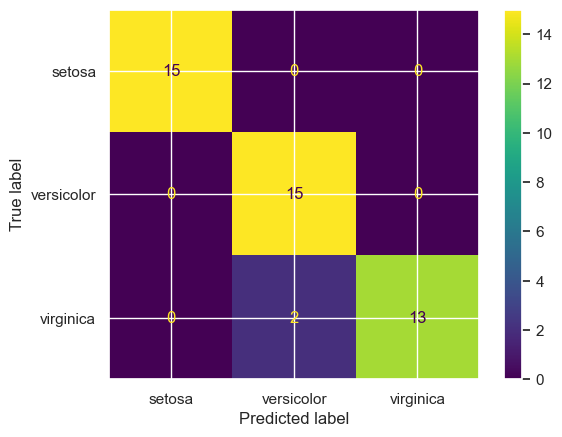

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gera a matriz
cm_dt = confusion_matrix(y_test, ypred_dt)

# Plota
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=iris.target_names)
disp.plot()
plt.show()

## 5.2. K-Nearest Neighbors (K-NN)

Vamos importar a classe KNeighborsClassifier do módulo sklearn.neighbors.  
Em seguida, instanciamos o objeto na variável clf_knn, definindo o hiperparâmetro n_neighbors igual a 5:

In [37]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)

Fazendo o treinamento do modelo:

In [38]:
clf_knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Fazendo a previsão com o modelo nos dados de teste:

In [39]:
ypred_knn = clf_knn.predict(X_test)

Vamos visualizar quais exemplos o modelo não conseguiu prever corretamente: 

In [40]:
tabela_knn = pd.DataFrame()

tabela_knn['Classe verdadeira'] = iris.target_names[y_test]
tabela_knn['Classe predita'] = iris.target_names[ypred_knn]

erros_knn = tabela_knn[tabela_knn['Classe verdadeira'] != tabela_knn['Classe predita']]

erros_knn

,Classe verdadeira,Classe predita
2,virginica,versicolor
30,virginica,versicolor


Calculando a acurácia obtida pelo modelo:

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred_knn)

0.9555555555555556

Geramos também a matriz de confusão:

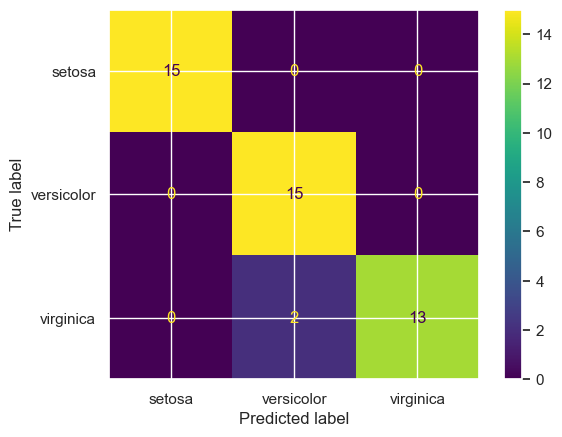

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gera a matriz
cm_knn = confusion_matrix(y_test, ypred_knn)

# Plota
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=iris.target_names)
disp.plot()
plt.show()